In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('datafile.csv')

In [6]:
# 데이터 확인

data.head()

,State/UT,Area,Ever tobacco users (%),Current tobacco users (%),Ever tobacco smokers (%),Current tobacco smokers (%),Ever cigarette users (%),Current cigarette users (%),Ever bidi users (%),Current bidi users (%),...,Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%),Students who were taught in class about harmful effects of tobacco use during past 12 months (%),Students who thought it is difficult to quit once someone starts smoking tobacco (%),Students who thought other people’s tobacco smoking is harmful to them (%),Students who favoured ban on smoking inside enclosed public places (%),Students who favoured ban on smoking at outdoor public places (%),"School heads aware of COTPA, 2003 (%)","Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003 (%)",Schools followed ‘tobacco-free school’ guidelines (%),Schools aware of the policy for displaying ‘tobacco-free school’ board (%)
0,India,Total,18.1,8.5,11.0,7.3,4.6,2.6,4.1,2.1,...,17.5,37.8,26.0,70.6,58.1,60.5,85.4,38.2,82.1,82.5
1,India,Urban,13.5,5.5,8.1,4.5,4.1,2.3,3.7,1.9,...,16.3,34.1,30.1,73.3,64.8,67.4,86.9,36.4,82.4,83.0
2,India,Rural,19.5,9.4,11.8,8.1,4.7,2.6,4.3,2.2,...,17.8,38.9,24.8,69.8,56.1,58.6,84.6,39.2,81.9,82.2
3,Andaman and Nicobar Islands,Total,21.5,4.4,8.8,3.7,4.4,1.3,2.7,1.0,...,21.1,23.4,23.0,69.0,65.0,60.6,88.6,1.1,76.0,67.9
4,Andaman and Nicobar Islands,Urban,13.3,3.4,6.5,2.6,3.7,1.3,2.0,0.7,...,20.2,25.7,26.9,66.6,65.1,60.9,89.1,0.0,85.3,42.5


In [30]:
data_columns = data[['State/UT', 'Area',
                     'Current cigarette users (%)',
                     'Ever cigarette users (%)',
                     'Exposure to tobacco smoke at home/public place (%)',
                     'Exposure to tobacco smoke at home   (%)',
                     'Exposure to tobacco smoke inside any enclosed public  places  (%)',
                     'Exposure to tobacco smoke at any outdoor public places  (%)']]

In [12]:
data_columns = pd.DataFrame(data_columns)

data_columns_filter = ~data_columns['Area'].isin(['Urban', 'Rural'])
#지역은 토탈, 도시, 시골로 나뉘어 있고 토탈에 데이터만을 사용하기 위해 도시와 시골은 삭제하는 과정을 거치기 위해
#Area칼럼을 True, False값으로 나는 값을 필터에 저장

filter_data = data_columns[data_columns_filter]
#저장한 필터를 통해 False는 드랍, True는 새로운 Filter_data에 저장

filter_data = filter_data.set_index('State/UT')
#새롭게 만든 filter_data에 인덱스를 해당하는 각각에 도시 이름으로 변경

filter_data.head(5)
#처리한 데이터 확인

,Area,Exposure to tobacco smoke at home/public place (%),Exposure to tobacco smoke at home (%),Exposure to tobacco smoke inside any enclosed public places (%),Exposure to tobacco smoke at any outdoor public places (%)
State/UT,,,,,
India,Total,29.5,11.2,21.2,23.4
Andaman and Nicobar Islands,Total,35.6,7.0,26.9,26.9
Andhra Pradesh,Total,31.8,7.2,22.5,25.0
Arunachal Pradesh,Total,69.7,31.4,67.9,64.1
Assam,Total,26.0,6.7,19.1,22.1


<Axes: xlabel='Current cigarette users (%)', ylabel='Ever cigarette users (%)'>

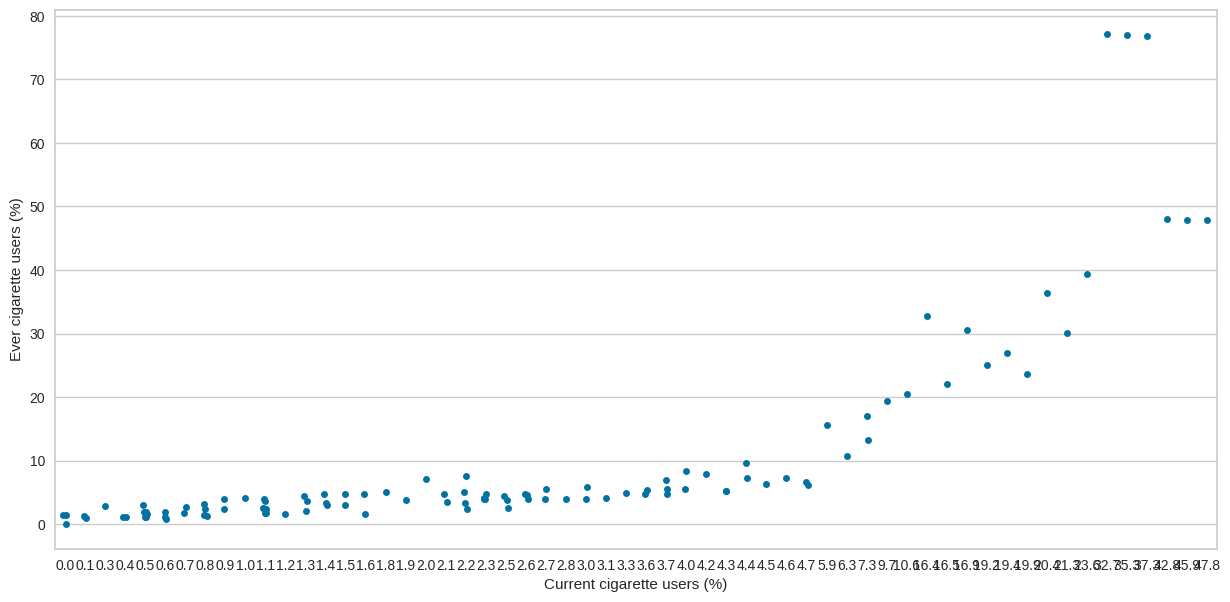

In [32]:
plt.figure(figsize=(15,7))

#현재 담배 사용자가 많은 국가일수록 항상 담배를 피우는 사용자가 많다는 것을 확인
sns.stripplot(x = 'Current cigarette users (%)', y= 'Ever cigarette users (%)', data=data_columns, jitter=True)

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = data_columns[['Current cigarette users (%)']]
Y = data_columns[['Ever cigarette users (%)']]

model.fit(X, Y)
result = model.predict([[15]])
print(result)

[[23.13804683]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


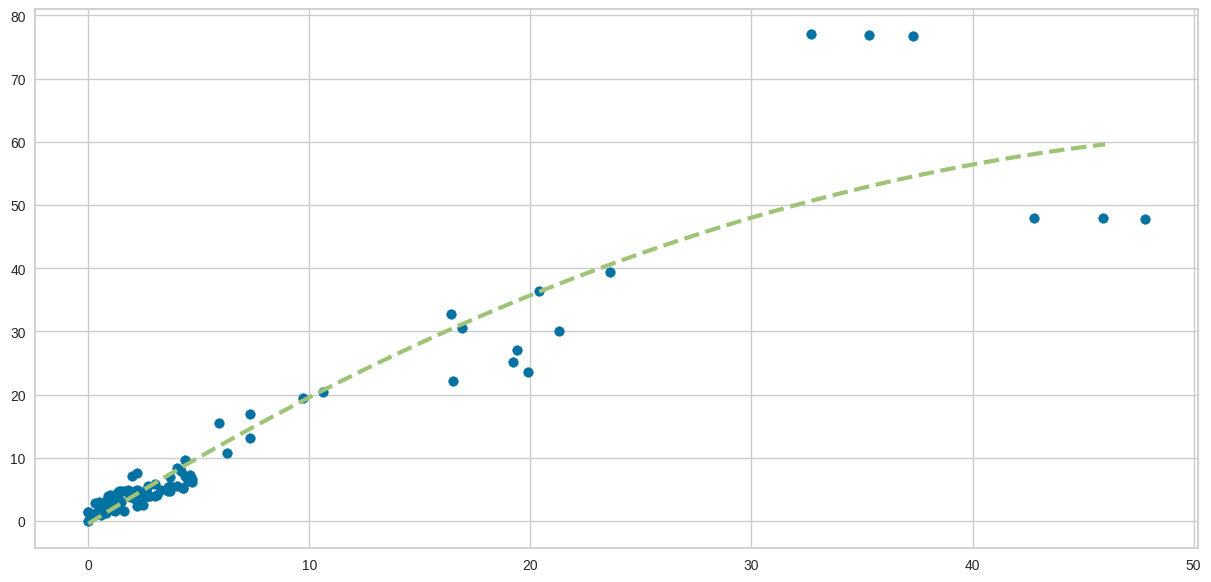

In [35]:
x = data_columns['Current cigarette users (%)']
y = data_columns['Ever cigarette users (%)']

fp1 = np.polyfit(x, y, 2)
f1 = np.poly1d(fp1)
fx = np.linspace(0, 46)
plt.figure(figsize=(15,7))
plt.scatter(x,y)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.show()

#선형회귀분석

In [13]:
data_values_kmeans= filter_data[['Exposure to tobacco smoke at home/public place (%)',
                     'Exposure to tobacco smoke at home   (%)',
                     'Exposure to tobacco smoke inside any enclosed public  places  (%)',
                     'Exposure to tobacco smoke at any outdoor public places  (%)']]

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

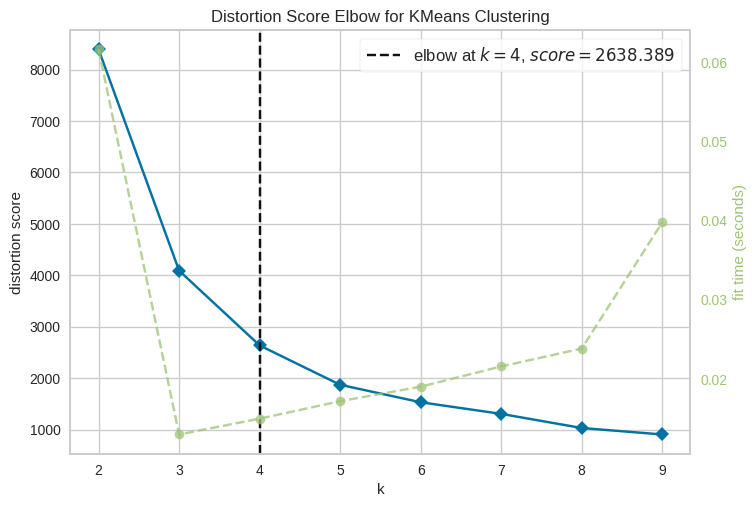

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(data_values_kmeans)
visualizer.show()

In [16]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(data_values_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [17]:
data_values_clusters = data_values_kmeans
data_values_clusters['Cluster'] = kmeans.labels_

In [18]:
data_values_clusters[['Cluster']]

,Cluster
State/UT,
India,2
Andaman and Nicobar Islands,2
Andhra Pradesh,2
Arunachal Pradesh,1
Assam,2
Bihar,3
Chandigarh,2
Chhattisgarh,2
Dadra and Nagar Haweli,2


In [19]:
filter_data_pca = filter_data.drop("Area", axis=1)
#PCA에 적용하기 위해 문자형 데이터를 가지는 'Area' 칼럼 삭제

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(filter_data_pca), columns = filter_data_pca.columns)
#StandardScaler통해 데이터 정규화 진행

In [21]:
from sklearn.decomposition import PCA
#PCA import

In [22]:
pca = PCA(n_components=2)
#PCA를 사용하여 표준화된 데이터에 PCA를 적용, 두 개의 주 성분을 얻기 위해 2로 설정
pca_data = pca.fit_transform(df_scale)
#해당 PCA에 정규화한 데이터를 적용

In [23]:
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
#pca진행한 데이터의 칼럼 명을 PCA1. PCA2로 지정하여 데이터프레임으로 생성하여 새로운 변수에 저장
pca_df.index = filter_data.index

pca_df

,PCA1,PCA2
State/UT,,
India,-0.761721,-0.203150
Andaman and Nicobar Islands,-0.415062,0.467417
Andhra Pradesh,-0.765546,0.248286
Arunachal Pradesh,4.786558,0.451953
Assam,-1.218291,0.066510
Bihar,-2.096635,-0.221799
Chandigarh,-1.344106,0.217743
Chhattisgarh,-0.060130,-0.457826
Dadra and Nagar Haweli,-0.402380,0.483423


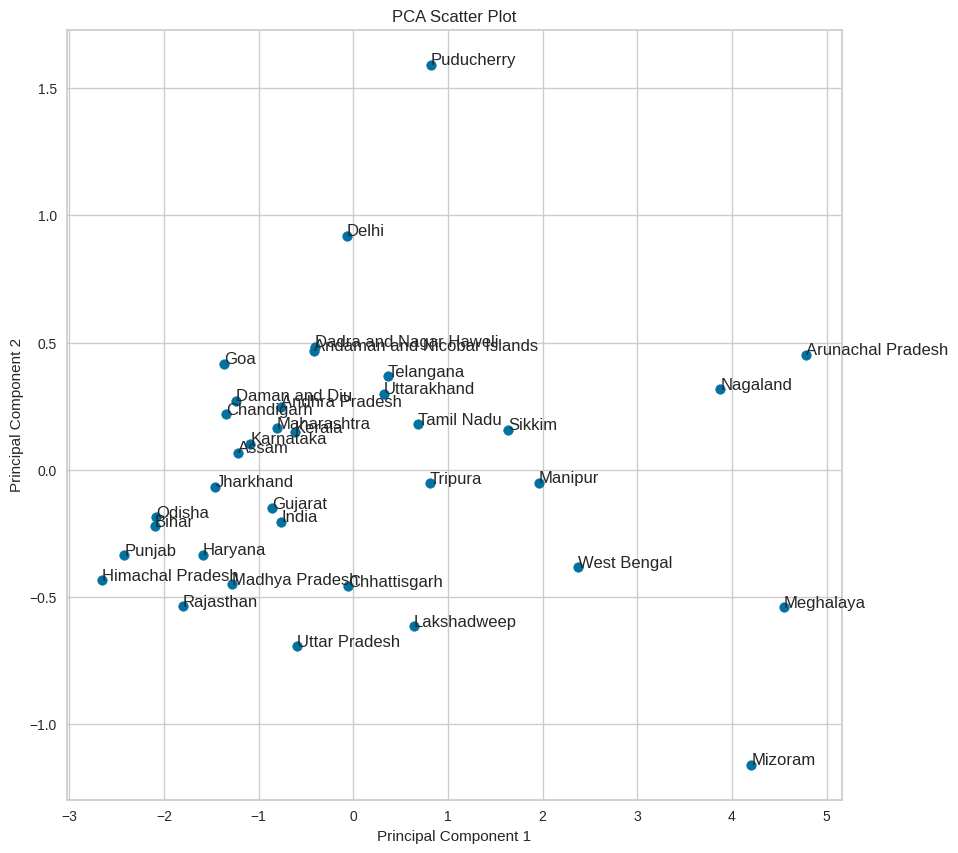

In [24]:
plt.figure(figsize=(10, 10))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')

for i, label in enumerate(pca_df.index):
    plt.annotate(label, (pca_df['PCA1'][i], pca_df['PCA2'][i]))

# Display the plot
plt.show()

<ipython-input-25-fb140a72e416>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans['Exposure to tobacco smoke at home/public place (%)'], bins=20)


Text(0.5, 1.0, 'Exposure to tobacco smoke at home/public place')

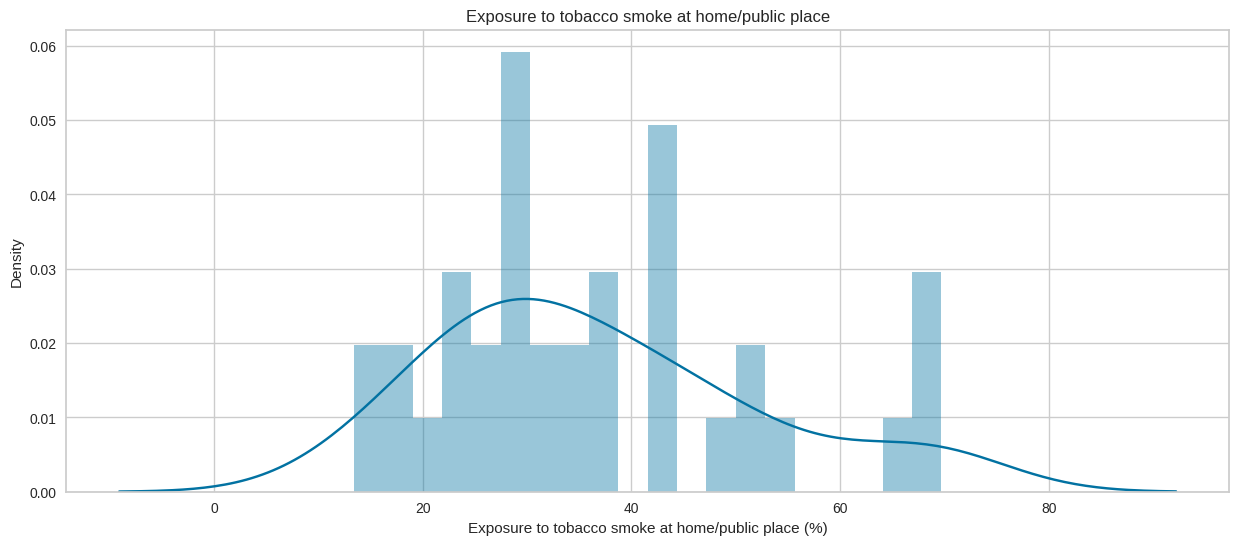

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans['Exposure to tobacco smoke at home/public place (%)'], bins=20)
plt.title('Exposure to tobacco smoke at home/public place')

<ipython-input-26-305e6c442270>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans['Exposure to tobacco smoke at home   (%)'], bins=20)


Text(0.5, 1.0, 'Exposure to tobacco smoke at home/public place')

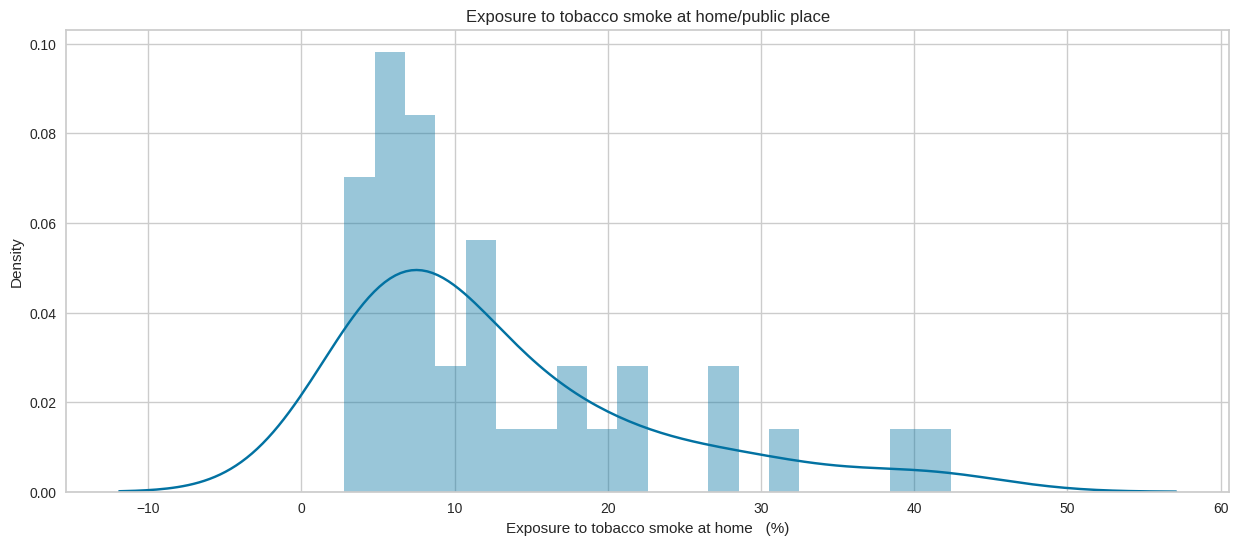

In [26]:
plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans['Exposure to tobacco smoke at home   (%)'], bins=20)
plt.title('Exposure to tobacco smoke at home')

<ipython-input-27-e42640b4c33d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans['Exposure to tobacco smoke inside any enclosed public  places  (%)'], bins=20)


Text(0.5, 1.0, 'Exposure to tobacco smoke inside any enclosed public  places')

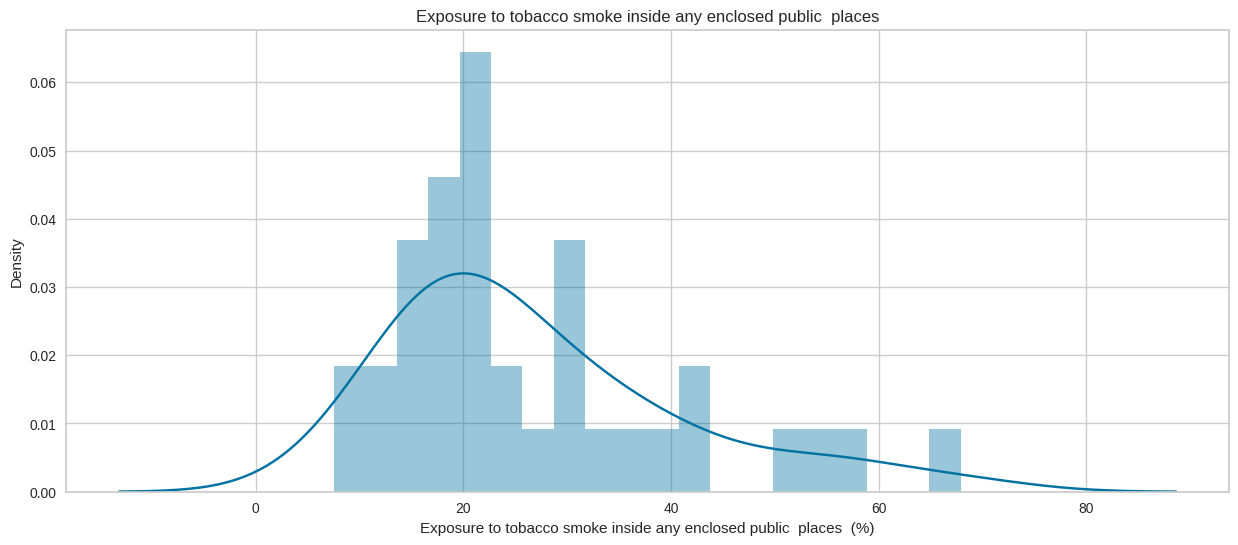

In [27]:
plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans['Exposure to tobacco smoke inside any enclosed public  places  (%)'], bins=20)
plt.title('Exposure to tobacco smoke inside any enclosed public  places')

<ipython-input-28-ab05da6c58f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_values_kmeans['Exposure to tobacco smoke at any outdoor public places  (%)'], bins=20)


Text(0.5, 1.0, 'Exposure to tobacco smoke at any outdoor public places')

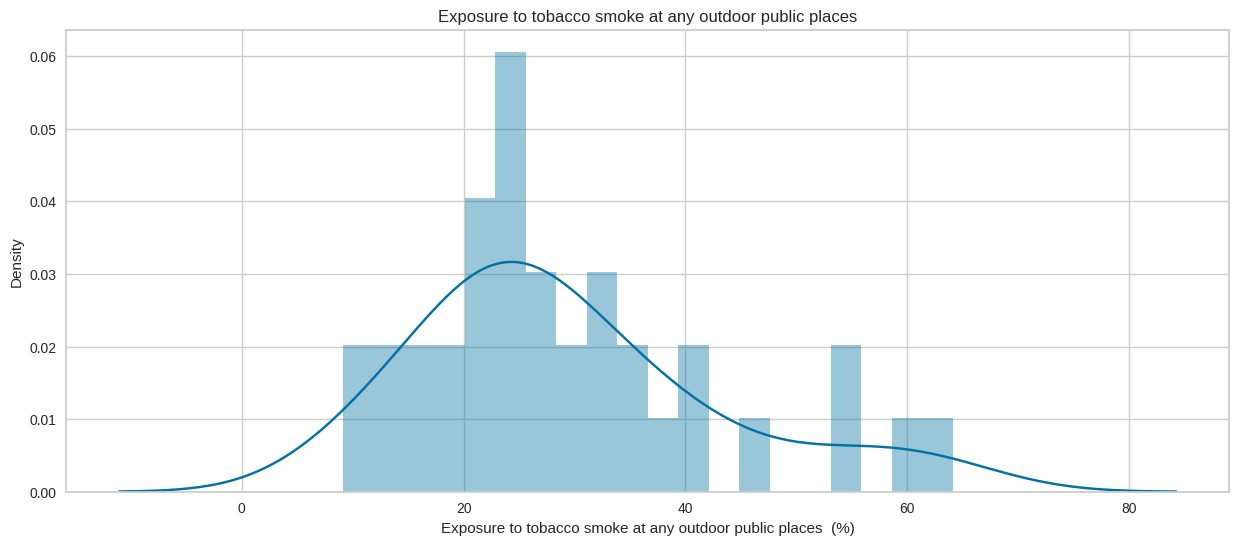

In [28]:
plt.figure(1, figsize = (15,6))
sns.distplot(data_values_kmeans['Exposure to tobacco smoke at any outdoor public places  (%)'], bins=20)
plt.title('Exposure to tobacco smoke at any outdoor public places')

**선형회귀분석 그래프를 그려 담배 사용자가 많은 국가일수록 항상 담배를 피우는 사용자가 많다는 것을 확인하였다. 이를 통해 담배 사용자를 통제하여야 수시로 담배를 피우는 사람이 줄어들고, 간접 흡연율도 낮출 수 있음을 파악하였다.**


**또한 가정/공공장소 담배연기 노출도가 가장 높은 것으로 나타나, 이를 모니터링하여 가정 및 공공장소에서의 흡연율을 낮출 수 있는 방안을 마련하는 것이 좋아 보인다.**



---



In [36]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [37]:
X = data_values_clusters[['Exposure to tobacco smoke at home/public place (%)',
                     'Exposure to tobacco smoke at home   (%)',
                     'Exposure to tobacco smoke inside any enclosed public  places  (%)',
                     'Exposure to tobacco smoke at any outdoor public places  (%)']]
y = data_values_clusters['Cluster']

In [38]:
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR = LogisticRegression(random_state=42)
DC = DecisionTreeClassifier(random_state=42, max_depth=8)

Voting = VotingClassifier( estimators=[('lr', LR), ('rf', DC)], voting='hard')

In [40]:
cross_val_score(LR, X, y, cv=5).mean()
LR.fit(X_train, y_train)

feature_LR = LR.coef_[0]
feature_LR

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


array([ 0.62779893, -0.07450661,  0.32735473,  0.50771472])

In [43]:
cross_val_score(DC,X,y, cv=5).mean()
DC.fit(X_train, y_train)
feature_DC = DC.feature_importances_
for i, weight in enumerate(feature_DC):
    feature_name = f"Feature {i+1}"
    print(f"{feature_name}: {weight}")

cross_val_score(Voting, X, y, cv=5).mean()

data_values_clusters

Feature 1: 0.7047272727272726
Feature 2: 0.0
Feature 3: 0.08484848484848488
Feature 4: 0.21042424242424249


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


,Exposure to tobacco smoke at home/public place (%),Exposure to tobacco smoke at home (%),Exposure to tobacco smoke inside any enclosed public places (%),Exposure to tobacco smoke at any outdoor public places (%),Cluster
State/UT,,,,,
India,29.5,11.2,21.2,23.4,2
Andaman and Nicobar Islands,35.6,7.0,26.9,26.9,2
Andhra Pradesh,31.8,7.2,22.5,25.0,2
Arunachal Pradesh,69.7,31.4,67.9,64.1,1
Assam,26.0,6.7,19.1,22.1,2
Bihar,18.4,5.4,14.3,11.9,3
Chandigarh,28.2,4.6,15.8,22.6,2
Chhattisgarh,36.8,16.8,25.6,24.2,2
Dadra and Nagar Haweli,38.0,6.5,21.6,30.8,2


In [45]:
new_data = [[52.3, 35.2, 25.2, 42.6]]

new = DC.predict(new_data)

print("Predicted Cluster:", new[0])

Predicted Cluster: 1
